In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MallCustomers") \
    .getOrCreate()

spark

In [2]:
df = spark.read.csv(
    "C:/Users/chath/Downloads/Mall_Customers.csv",
    header=True,
    inferSchema=True
)

df.show(5)

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



In [3]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



In [4]:
df_clean = df \
    .withColumnRenamed("Annual Income (k$)", "AnnualIncome") \
    .withColumnRenamed("Spending Score (1-100)", "SpendingScore")

df_clean.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- AnnualIncome: integer (nullable = true)
 |-- SpendingScore: integer (nullable = true)



In [5]:
from pyspark.sql.functions import col, sum

df_clean.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_clean.columns]).show()

+----------+-----+---+------------+-------------+
|CustomerID|Genre|Age|AnnualIncome|SpendingScore|
+----------+-----+---+------------+-------------+
|         0|    0|  0|           0|            0|
+----------+-----+---+------------+-------------+



In [6]:
df_clean.describe().show()

+-------+------------------+------+-----------------+-----------------+------------------+
|summary|        CustomerID| Genre|              Age|     AnnualIncome|     SpendingScore|
+-------+------------------+------+-----------------+-----------------+------------------+
|  count|               200|   200|              200|              200|               200|
|   mean|             100.5|  NULL|            38.85|            60.56|              50.2|
| stddev|57.879184513951124|  NULL|13.96900733155888|26.26472116527124|25.823521668370173|
|    min|                 1|Female|               18|               15|                 1|
|    max|               200|  Male|               70|              137|                99|
+-------+------------------+------+-----------------+-----------------+------------------+



In [7]:
pdf = df_clean.toPandas()
pdf.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df_clean.show(10)

+----------+------+---+------------+-------------+
|CustomerID| Genre|Age|AnnualIncome|SpendingScore|
+----------+------+---+------------+-------------+
|         1|  Male| 19|          15|           39|
|         2|  Male| 21|          15|           81|
|         3|Female| 20|          16|            6|
|         4|Female| 23|          16|           77|
|         5|Female| 31|          17|           40|
|         6|Female| 22|          17|           76|
|         7|Female| 35|          18|            6|
|         8|Female| 23|          18|           94|
|         9|  Male| 64|          19|            3|
|        10|Female| 30|          19|           72|
+----------+------+---+------------+-------------+
only showing top 10 rows



In [9]:
from pyspark.sql.functions import col, sum
df_clean.select(sum(col("Genre").isNull().cast("int"))).show()

+---------------------------------+
|sum(CAST((Genre IS NULL) AS INT))|
+---------------------------------+
|                                0|
+---------------------------------+



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

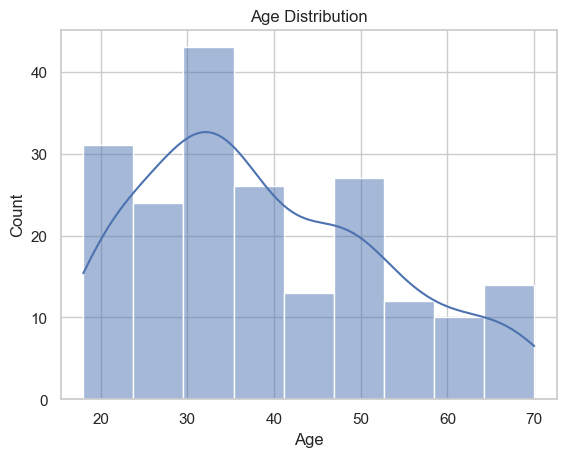

In [15]:
sns.histplot(pdf["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

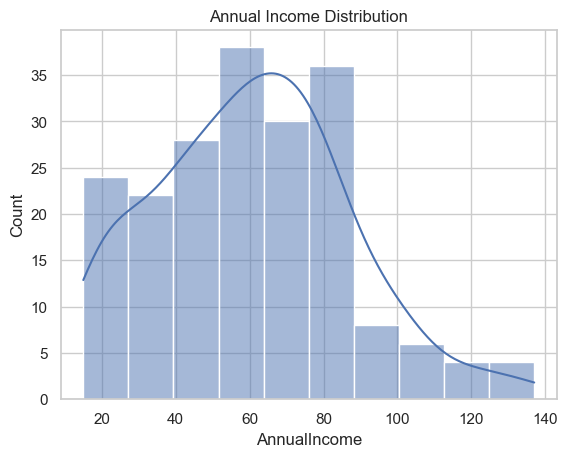

In [16]:
sns.histplot(pdf["AnnualIncome"], kde=True)
plt.title("Annual Income Distribution")
plt.show()

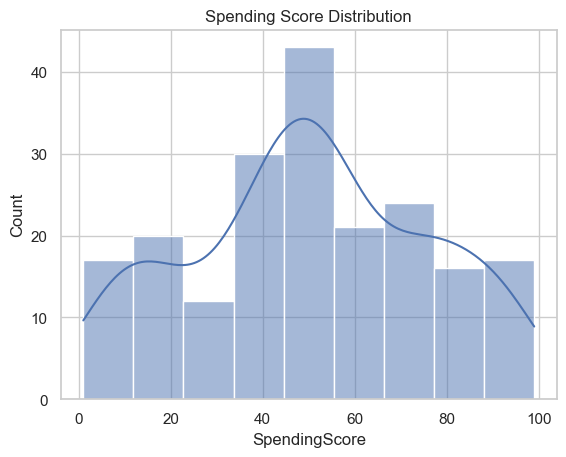

In [17]:
sns.histplot(pdf["SpendingScore"], kde=True)
plt.title("Spending Score Distribution")
plt.show()

In [19]:
pdf = df_clean.toPandas()

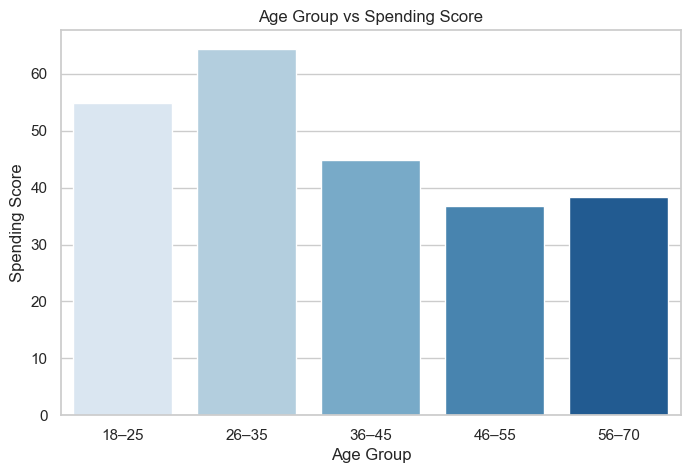

In [27]:
pdf["AgeGroup"] = pd.cut(
    pdf["Age"],
    bins=[17,25,35,45,55,70],
    labels=["18–25","26–35","36–45","46–55","56–70"]
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=pdf,
    x="AgeGroup",
    y="SpendingScore",
    errorbar=None,
    hue="AgeGroup",
    palette="Blues",
    legend=False
)
plt.title("Age Group vs Spending Score")
plt.xlabel("Age Group")
plt.ylabel("Spending Score")
plt.show()

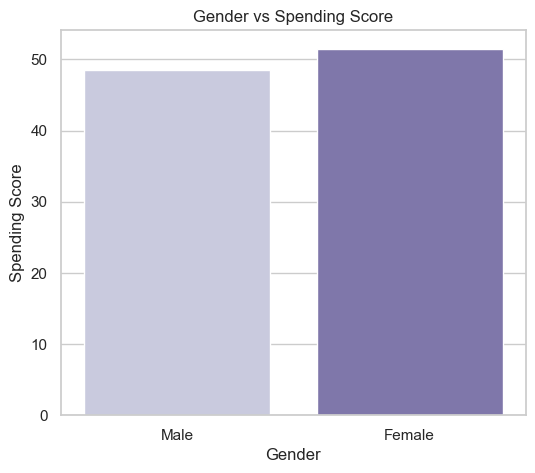

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=pdf,
    x="Genre",
    y="SpendingScore",
    errorbar=None,
    hue="Genre",
    palette="Purples",
    legend=False
)
plt.title("Gender vs Spending Score")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

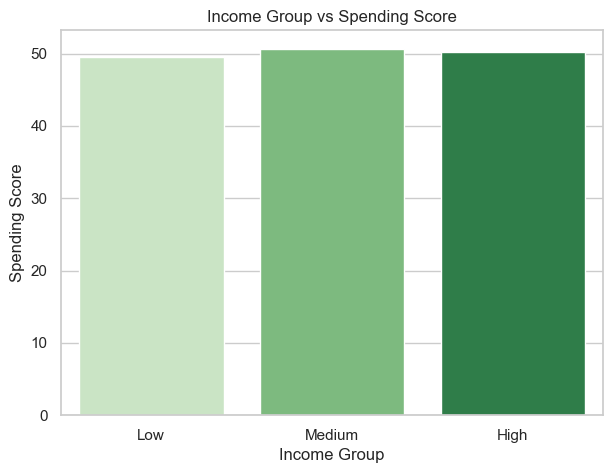

In [29]:
pdf["IncomeGroup"] = pd.cut(
    pdf["AnnualIncome"],
    bins=[0,40,70,150],
    labels=["Low","Medium","High"]
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=pdf,
    x="IncomeGroup",
    y="SpendingScore",
    errorbar=None,
    hue="IncomeGroup",
    palette="Greens",
    legend=False
)
plt.title("Income Group vs Spending Score")
plt.xlabel("Income Group")
plt.ylabel("Spending Score")
plt.show()

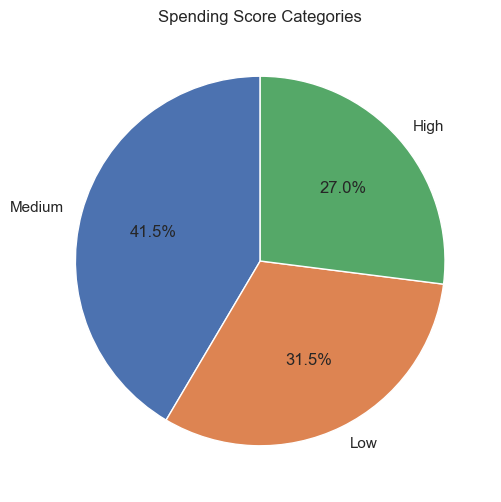

In [30]:
pdf["SpendingCategory"] = pd.cut(
    pdf["SpendingScore"],
    bins=[0,40,70,100],
    labels=["Low","Medium","High"]
)

counts = pdf["SpendingCategory"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Spending Score Categories")
plt.show()